In [1]:
from collections import defaultdict
from itertools import combinations
from datetime import datetime

In [2]:
def Merge(dict1, dict2):
    res = {**dict1, **dict2}
    return res

In [3]:
class Apriori:
    def __init__(self, filename):
        self.Transactions = list()
        self.C_one = defaultdict(int)
        self.file = filename
        self.L_one = defaultdict(int)
        self.K = 1
        self.GlobalFreqItem = defaultdict(int)
    
    def Return_TBD(self):
        return self.Transactions
    
    def ExtractData(self):
        with open(self.file,'r') as file:
            data = file.readlines()
            for i in data:
                temp = frozenset(map(int,i.split()))
                self.Transactions.append(temp)
                
                for item in temp:
                    self.C_one[frozenset([item])] +=1

    def Extract_Freq_Items(self,C_k,threshold):
        return {k:v for k,v in C_k.items() if v >= threshold}
    
    def Candidate_Generation(self,prev_freq_items,k):
        return set([i.union(j) for i in prev_freq_items for j in prev_freq_items if len(i.union(j)) == k])
    
    def Count_Support(self,Candidates_Set,k):
        C_k = defaultdict(int)
        for i in self.Transactions:
            if len(i) == k:
                if i in Candidates_Set:
                    C_k[i] += 1
            elif len(i) > k:
                subsets = list(combinations(i,k))
                for j in subsets:
                    if frozenset(j) in Candidates_Set:
                        C_k[frozenset(j)] += 1
        return C_k
    
    def apriori(self,Min_Freq):
        start_time = datetime.now()
        self.ExtractData()
        min_sup = Min_Freq*len(self.Transactions)
        self.L_one = self.Extract_Freq_Items(self.C_one,min_sup)
        prev_freq_items = self.L_one.copy()
        self.GlobalFreqItem[self.K] = prev_freq_items
        while (len(prev_freq_items) > 0):
            candidates = self.Candidate_Generation(prev_freq_items.keys(),self.K+1)
            C_k = self.Count_Support(candidates,self.K+1)
            prev_freq_items = self.Extract_Freq_Items(C_k,min_sup)
            self.K+=1
            self.GlobalFreqItem[self.K] = prev_freq_items

        end_time = datetime.now()
        time_taken = end_time - start_time

        return self.GlobalFreqItem,time_taken

In [4]:
Time = list()
Patterns = {}
for i in [0.0001,0.0002,0.0003,0.0004,0.0005]:
    Patterns[i] = {}
    apriori = Apriori('trans.txt')
    Items,T = apriori.apriori(Min_Freq=i)
    Time.append(T)
    for j in range(1,len(Items)):
        Patterns[i] = Merge(Items[j],Patterns[i])

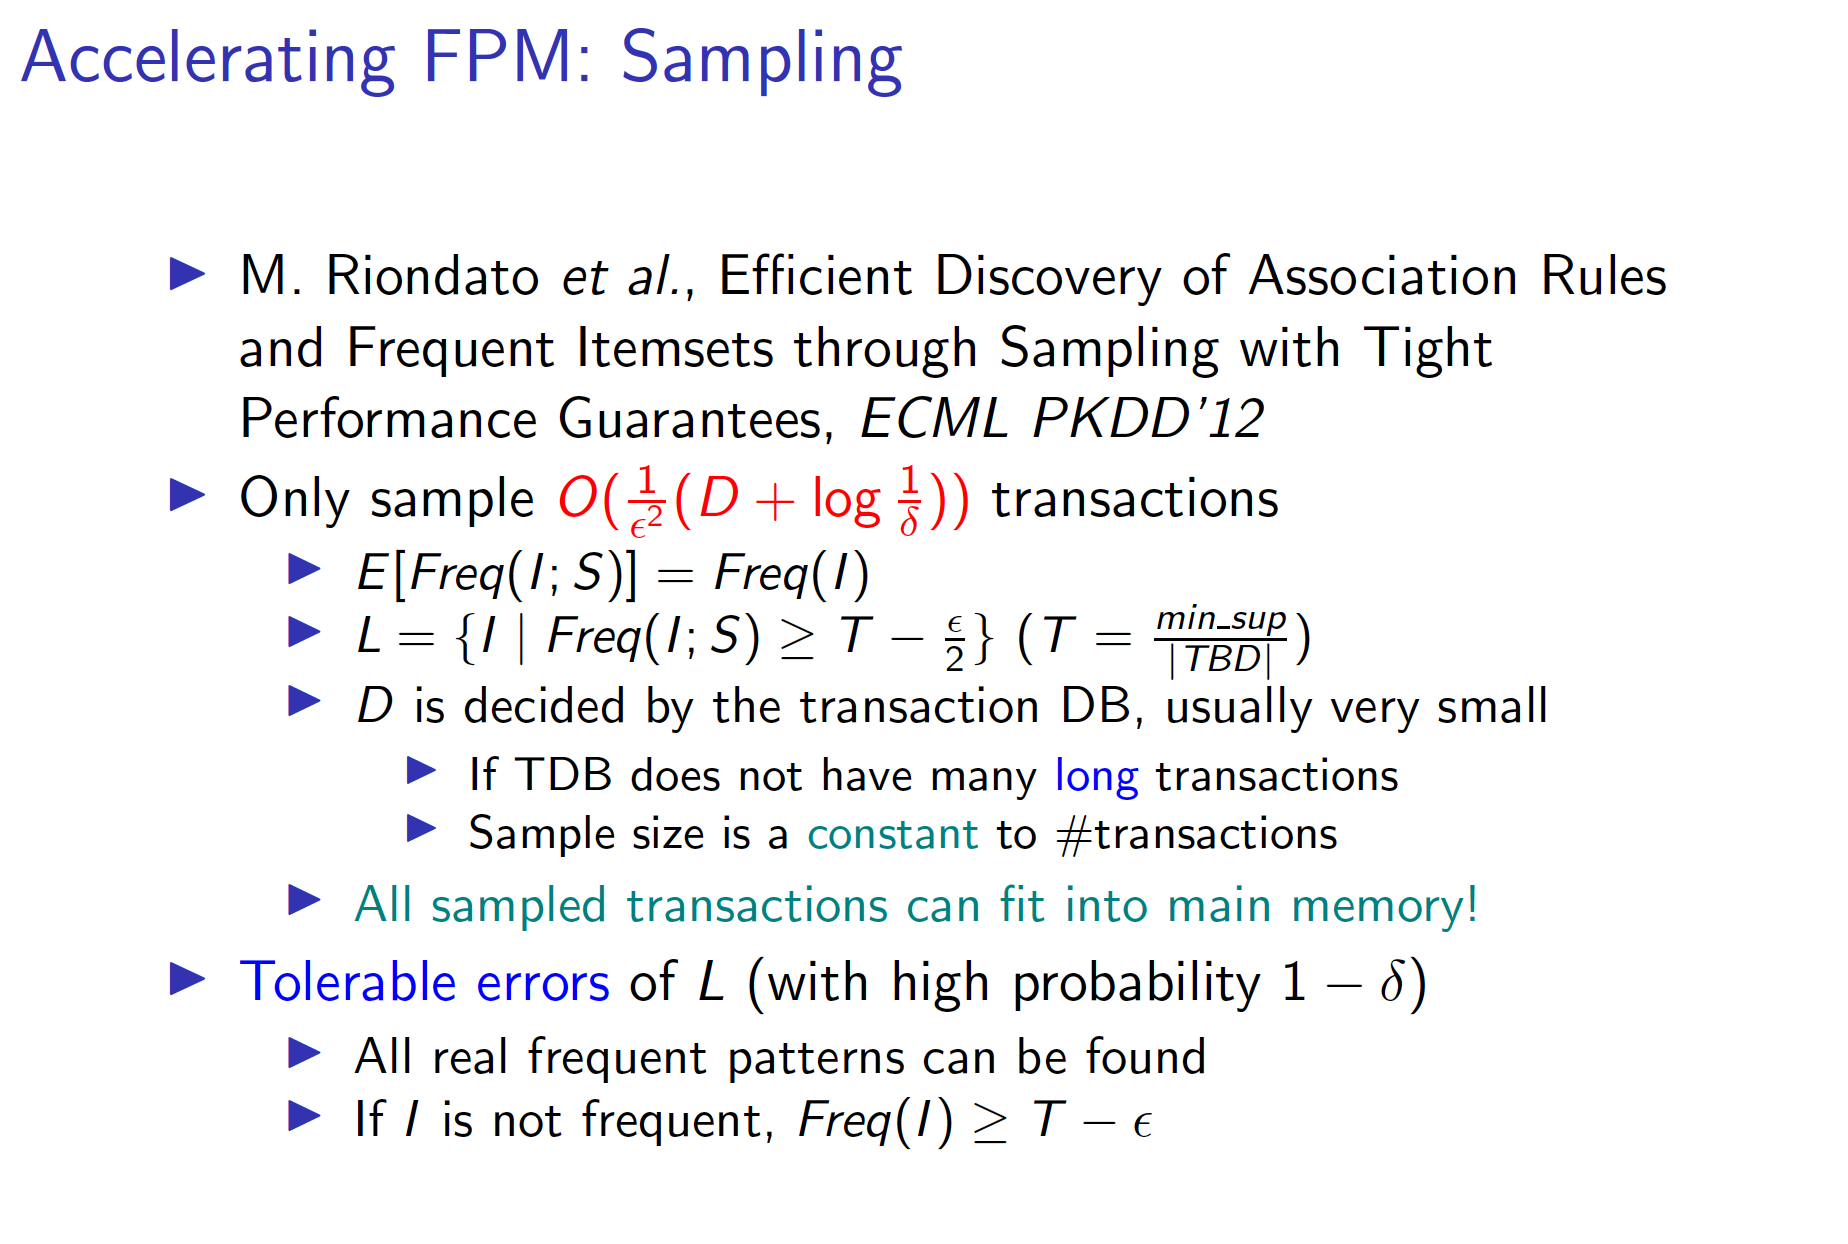

#### Sampling an further accelerate it. Let $ \delta $ be 0.01 and $ \epsilon $ be 0.005. We set the constant D to be 7.

In [5]:
import math
delta = 0.01
epsilon = 0.005
D = 7
sample_size = int(1/(math.pow(epsilon,2))*(D + math.log10(1/delta)))
print(sample_size)

360000


In [6]:
import random
from random import sample
random.seed(25)

In [7]:
class Sample_Apriori:
    def __init__(self, filename):
        self.Transactions = list()
        self.Sample_Transactions = list()
        self.C_one = defaultdict(int)
        self.file = filename
        self.L_one = defaultdict(int)
        self.K = 1
        self.GlobalFreqItem = defaultdict(int)
    
    def Return_TBD(self,sample_size):
        return self.Transactions
    
    def ExtractData(self,sample_size):
        with open(self.file,'r') as file:
            data = file.readlines()
            for i in data:
                temp = frozenset(map(int,i.split()))
                self.Transactions.append(temp)
        
        self.Sample_Transactions = sample(self.Transactions,sample_size)
        for i in self.Sample_Transactions:
            for item in i:
                self.C_one[frozenset([item])] +=1

    def Extract_Freq_Items(self,C_k,threshold):
        return {k:v for k,v in C_k.items() if v >= threshold}
    
    def Candidate_Generation(self,prev_freq_items,k):
        return set([i.union(j) for i in prev_freq_items for j in prev_freq_items if len(i.union(j)) == k])
    
    def Count_Support(self,Candidates_Set,k):
        C_k = defaultdict(int)
        for i in self.Sample_Transactions:
            if len(i) == k:
                if i in Candidates_Set:
                    C_k[i] += 1
            elif len(i) > k:
                subsets = list(combinations(i,k))
                for j in subsets:
                    if frozenset(j) in Candidates_Set:
                        C_k[frozenset(j)] += 1
        return C_k
    
    def apriori(self,Min_Freq,sample_size):
        start_time = datetime.now()
        self.ExtractData(sample_size)
        min_sup = Min_Freq*len(self.Sample_Transactions)
        self.L_one = self.Extract_Freq_Items(self.C_one,min_sup)
        prev_freq_items = self.L_one.copy()
        self.GlobalFreqItem[self.K] = prev_freq_items
        while (len(prev_freq_items) > 0):
            candidates = self.Candidate_Generation(prev_freq_items.keys(),self.K+1)
            C_k = self.Count_Support(candidates,self.K+1)
            prev_freq_items = self.Extract_Freq_Items(C_k,min_sup)
            self.K+=1
            self.GlobalFreqItem[self.K] = prev_freq_items

        end_time = datetime.now()
        time_taken = end_time - start_time

        return self.GlobalFreqItem,time_taken

In [8]:
Sample_Time = list()
Sample_Patterns = {}
for i in [0.0001,0.0002,0.0003,0.0004,0.0005]:
    Sample_Patterns[i] = {}
    apriori = Sample_Apriori('trans.txt')
    Items,T = apriori.apriori(Min_Freq=i,sample_size=sample_size)
    Sample_Time.append(T)
    for j in range(1,len(Items)):
        Sample_Patterns[i] = Merge(Items[j],Sample_Patterns[i])

In [9]:
Time

[datetime.timedelta(seconds=93, microseconds=980459),
 datetime.timedelta(seconds=40, microseconds=29399),
 datetime.timedelta(seconds=31, microseconds=142754),
 datetime.timedelta(seconds=22, microseconds=846165),
 datetime.timedelta(seconds=24, microseconds=802560)]

In [10]:
Sample_Time

[datetime.timedelta(seconds=88, microseconds=763551),
 datetime.timedelta(seconds=41, microseconds=739874),
 datetime.timedelta(seconds=28, microseconds=24113),
 datetime.timedelta(seconds=19, microseconds=916158),
 datetime.timedelta(seconds=16, microseconds=813124)]

We sampled approximately half of the transactions, with $ \delta = 0.01 $ and $ \epsilon = 0.005 $. Running time is slightly lower than the original algorithm that runs on the whole Transactions Data.

In [11]:
False_Negatives = {}
for i in Patterns.keys():
    False_Negatives[i] = {k:v for k,v in Patterns[i].items() if k not in Sample_Patterns[i]}

In [12]:
False_Positives = {}
for i in Patterns.keys():
    False_Positives[i] = {k:v for k,v in Sample_Patterns[i].items() if k not in Patterns[i]}

In [13]:
for i in False_Negatives.keys():
    print("False Negatives with min freq = {} :".format(i),len(False_Negatives[i]))

False Negatives with min freq = 0.0001 : 821
False Negatives with min freq = 0.0002 : 255
False Negatives with min freq = 0.0003 : 165
False Negatives with min freq = 0.0004 : 95
False Negatives with min freq = 0.0005 : 54


In [14]:
for i in False_Positives.keys():
    print("False Positives with min freq = {} :".format(i),len(False_Positives[i]))

False Positives with min freq = 0.0001 : 1200
False Positives with min freq = 0.0002 : 382
False Positives with min freq = 0.0003 : 161
False Positives with min freq = 0.0004 : 123
False Positives with min freq = 0.0005 : 76
